In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
import pandas as pd
import numpy as np
import json
import netCDF4

In [2]:
region_vote = pd.read_csv("../Resources/region_vote_df.csv")
county_vote = pd.read_csv("../Resources/county_vote_df.csv")
county_vote.head()

,Unnamed: 0,Region,Area,Electorate,Pct_Turnout,Valid_Votes,Remain,Leave,Pct_Remain,Pct_Leave
0,0,East,Peterborough,120892,72.35,87392,34176,53216,0.391066,0.608934
1,1,East,Luton,127612,66.31,84481,36708,47773,0.434512,0.565488
2,2,East,Southend-on-Sea,128856,72.90,93870,39348,54522,0.419175,0.580825
3,3,East,Thurrock,109897,72.75,79916,22151,57765,0.277179,0.722821
4,4,East,Bedford,119530,72.06,86066,41497,44569,0.482153,0.517847


367
367


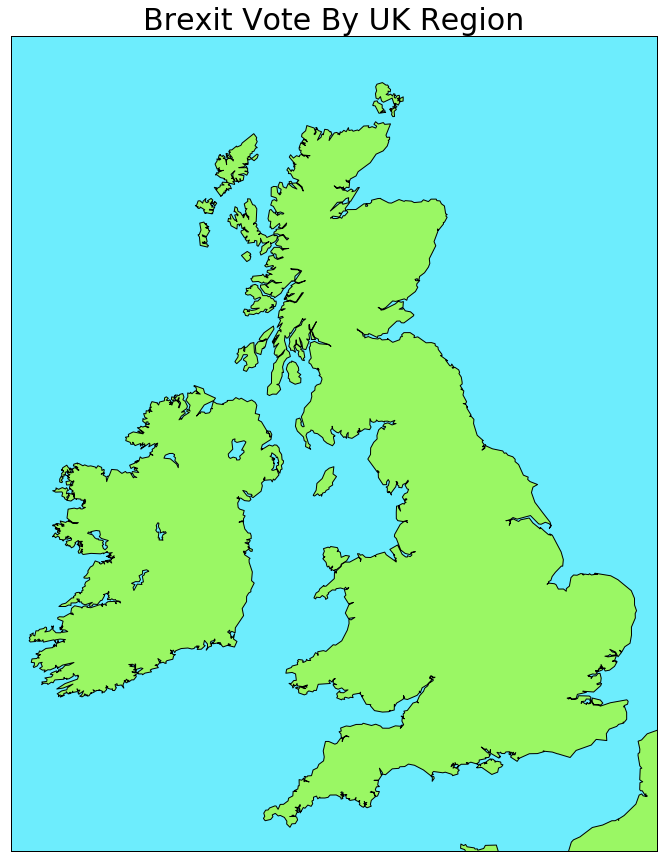

In [31]:
fig = plt.figure(figsize = [15,15])
plt.title('Brexit Vote By UK Region', fontsize=30)
ax= fig.add_subplot(111)

map = Basemap(llcrnrlon=-10.5,llcrnrlat=49.5,urcrnrlon=3.5,urcrnrlat=59.5,
            resolution='i',projection='tmerc',lon_0=-4.36,lat_0=54.7)

map.drawmapboundary(fill_color='#6dedfd')
map.fillcontinents(color='#9af764',lake_color='#6dedfd')
map.drawcoastlines()

map.readshapefile('../Resources/NUTS_Level_1_January_2018_Ultra_Generalised_Clipped_Boundaries_in_the_United_Kingdom/NUTS_Level_1_January_2018_Ultra_Generalised_Clipped_Boundaries_in_the_United_Kingdom_WGS84', 'ukregion', drawbounds=False)

print(len(map.ukregion_info))
print(len(map.ukregion))
# # map.ukregion_info
# for info, shape in zip(map.ukregion_info, map.ukregion):
#     if info['nuts118nm'] == 'Yorkshire and The Humber':
#         x, y = zip(*shape) 
#         map.plot(x, y, marker=None,color='m')
#         print(x)
#         print(y)

# patches   = []

# for info, shape in zip(map.ukregion_info, map.ukregion):
#     if info['nuts118nm'] == 'Yorkshire and The Humber':
# #         print(info)
#         print(np.array(shape))
#         patches.append(Polygon(np.array(shape), True))


# ax.add_collection(PatchCollection(patches, facecolor= 'blue', edgecolor='k', linewidths=1.5))
        

plt.show()

In [15]:

file = netCDF4.Dataset(url)
lat  = file.variables['lat'][:]
lon  = file.variables['lon'][:]
data = file.variables['htsgwsfc'][1,:,:]
file.close()

# Since Python is object oriented, you can explore the contents of the NOMADS
# data set by examining the file object, such as file.variables.

# The indexing into the data set used by netCDF4 is standard python indexing.
# In this case we want the first forecast step, but note that the first time 
# step in the RTOFS OpenDAP link is all NaN values.  So we start with the 
# second timestep

# Plot the field using Basemap.  Start with setting the map
# projection using the limits of the lat/lon data itself:
fig=plt.figure(figsize=(12, 8) )

# Miller projection:
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
  urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')


# convert the lat/lon values to x/y projections.

x, y = m(*np.meshgrid(lon,lat))

# plot the field using the fast pcolormesh routine 
# set the colormap to jet.

m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
m.colorbar(location='right')

# Add a coastline and axis values.

m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

# Add a colorbar and title, and then show the plot.

plt.title('Example 1: NWW3 Significant Wave Height from NOMADS');

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 10.6M    0 48750    0     0  48750      0  0:03:49 --:--:--  0:03:49  105k
  9 10.6M    9 1023k    0     0  1023k      0  0:00:10  0:00:01  0:00:09  704k
 20 10.6M   20 2207k    0     0  1103k      0  0:00:09  0:00:02  0:00:07  905k
 25 10.6M   25 2751k    0     0   917k      0  0:00:11  0:00:03  0:00:08  804k
 30 10.6M   30 3375k    0     0   843k      0  0:00:12  0:00:04  0:00:08  765k
 37 10.6M   37 4095k    0     0   819k      0  0:00:13  0:00:05  0:00:08  817k
 44 10.6M   44 4831k    0     0   805k      0  0:00:13  0:00:06  0:00:07  763k
 51 10.6M   51 5631k    0     0   804k      0  0:00:13  0:00:07  0:00:06  684k
 59 10.6M   59 6511k    0     0   813k      0  0:00:13  0:00:08  0:00:05  752k
 68 10.6M   68 7455k    0     0   828k      0  0:00

OrderedDict([('lat', <class 'netCDF4._netCDF4.Variable'>
              float32 lat(lat)
                  units: degrees_north
                  actual_range: [ 90. -90.]
                  long_name: Latitude
                  standard_name: latitude
                  axis: Y
              unlimited dimensions: 
              current shape = (73,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('lon', <class 'netCDF4._netCDF4.Variable'>
              float32 lon(lon)
                  units: degrees_east
                  long_name: Longitude
                  actual_range: [  0.  357.5]
                  standard_name: longitude
                  axis: X
              unlimited dimensions: 
              current shape = (144,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('time', <class 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  long_name: Time
                 

<Figure size 864x576 with 0 Axes>